In [1]:
import tensorflow as tf
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score

In [2]:
# Load MNSIT
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Preprocess and Normalize the data
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
# Flatten the data
x_train = x_train.reshape(len(x_train),-1)
x_test = x_test.reshape(len(x_test),-1)

Clustering approaches were influenced by https://medium.com/@joel_34096/k-means-clustering-for-image-classification-a648f28bdc47

In [5]:
# Define clusters to check
cluster_cand = [8, 9, 10, 11, 12, 13]

In [6]:
# Testing Clusters
for c in cluster_cand:
  clstr = MiniBatchKMeans(n_clusters = c)

  clstr.fit(x_train)

  print(clstr.inertia_)

2461176.0
2407331.75
2370802.0
2366484.75
2325553.25
2275067.0


In [7]:
# Define Principal Components
principal_components = [2, 5, 10, 15, 20, 25, 50, 100]

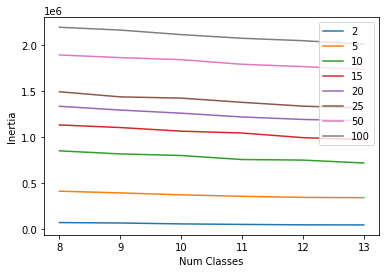

In [8]:
# Cluster and PCA - 
for pc in principal_components:
  cs = []
  pca = PCA(n_components=pc)
  pca.fit(x_train)
  data = pca.transform(x_train)
  for c in cluster_cand:
    clstr = MiniBatchKMeans(n_clusters = c)

    clstr.fit(data)

    cs.append(clstr.inertia_)

  plt.plot(cluster_cand, cs, label=str(pc))


plt.xlabel("Num Classes")
plt.ylabel("Inertia")
plt.legend(loc='upper right')
plt.show()

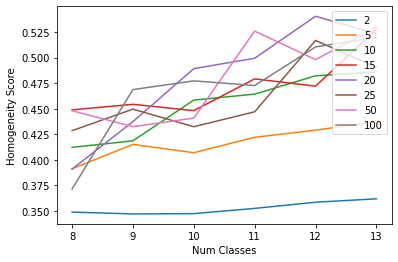

In [9]:
# Cluster and PCA - Homogeneiity
for pc in principal_components:
  cs = []
  pca = PCA(n_components=pc)
  pca.fit(x_train)
  data = pca.transform(x_train)
  for c in cluster_cand:
    clstr = MiniBatchKMeans(n_clusters = c)

    clstr.fit(data)

    cs.append(homogeneity_score(y_train,clstr.labels_))

  plt.plot(cluster_cand, cs, label=str(pc))


plt.xlabel("Num Classes")
plt.ylabel("Homogeneity Score")
plt.legend(loc='upper right')
plt.show()